In [1]:
%pylab --no-import-all notebook
import warnings
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import pandas as pd
import Classification as CL
import os
import time
from copy import copy
way = os.getcwd() + "/Data_npy/"
way1 = way + "Chosen ones/"
valid_path = os.getcwd() + "/Validační tabulky/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
trlist = np.load(way1 + "new_list.npy").tolist()

<IPython.core.display.Javascript object>


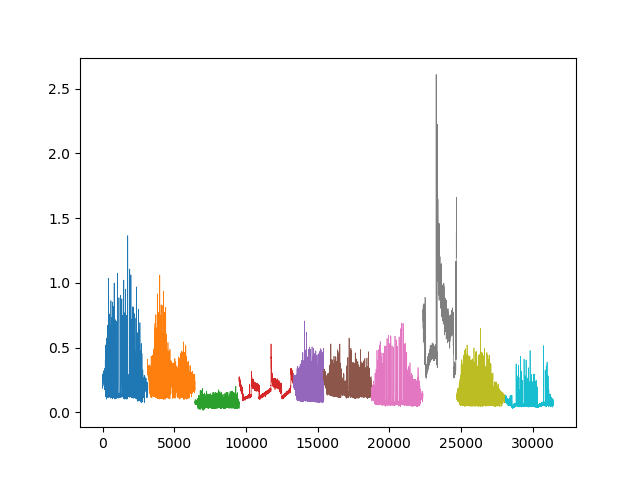

In [3]:
tmp = [np.load(way1 + d)[1] for d in trlist]
plt.figure("Vybraná reálná data")
posun = 0
for i in tmp:
    plt.plot(np.arange(len(i))+ posun, i, '-', lw=0.5)
    posun = posun +len(i) 
plt.show()

<IPython.core.display.Javascript object>


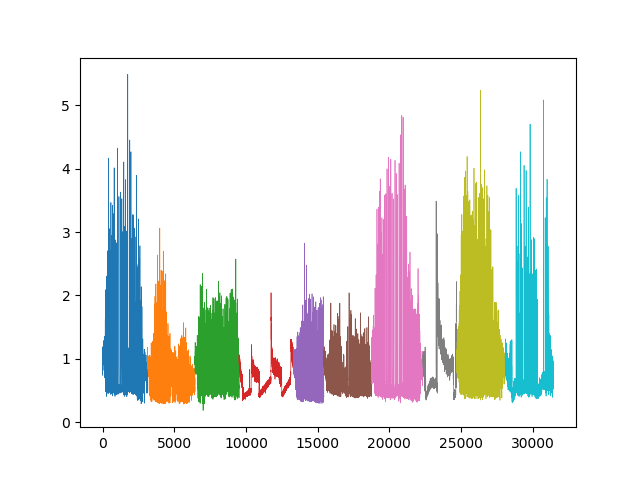

In [4]:
norma = [CL.normalization(np.load(way1 + d)[1] , delka_useku = 20, training_set = True) for d in trlist]
plt.figure("Vybraná reálná data po normalizaci")
posun = 0
for i in norma:
    plt.plot(np.arange(len(i))+ posun, i, '-', lw=0.5)
    posun = posun +len(i)
plt.show()

In [5]:
train_data = []
test_data = []
for data in trlist:
    train_data.append(np.load(way1 + data))
    
test_data.append(copy(train_data[-1]))

In [6]:
print(len(train_data), len(test_data))

10 1


In [39]:
G_HMM = GaussianHMM(3)

In [40]:
tab = CL.validace_new(G_HMM, train_data[:-1], \
                      test_data, [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


6348.274816036224


In [41]:
tab.to_csv(valid_path + 'Real_data_HMM_1_Obecne_unsup.csv',index=False)

In [9]:
train_data1 = copy(train_data[:-2])
train_data1.append(copy(train_data[-1]))
len(train_data1)

9

In [10]:
Sorted = tab.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2470,"(1, 0, 0, 1, 1)","(0, 0, 12, 16)",0.789239,709,0.907139,0.618915,0.701735,0.742596,0.937050,0.451318,0.911268,0.879078,0.984513,0.570547
2833,"(1, 0, 1, 0, 1)","(0, 0, 14, 16)",0.788644,711,0.906332,0.616335,0.706074,0.742914,0.941783,0.446766,0.916901,0.873453,0.993363,0.574074
2845,"(1, 0, 1, 0, 1)","(0, 0, 16, 16)",0.788644,711,0.908932,0.614227,0.703261,0.742140,0.944782,0.444554,0.916431,0.875703,0.993363,0.570547
2821,"(1, 0, 1, 0, 1)","(0, 0, 12, 16)",0.787455,715,0.904790,0.614648,0.706457,0.741965,0.941069,0.444995,0.918195,0.871204,0.993363,0.574074
2482,"(1, 0, 0, 1, 1)","(0, 0, 14, 16)",0.785672,721,0.907402,0.612301,0.693900,0.737868,0.937612,0.445226,0.907407,0.879078,0.980088,0.561728
2469,"(1, 0, 0, 1, 1)","(0, 0, 12, 15)",0.783591,728,0.905312,0.614958,0.685714,0.735328,0.930012,0.447581,0.909621,0.881890,0.982301,0.550265
2494,"(1, 0, 0, 1, 1)","(0, 0, 16, 16)",0.782996,730,0.906713,0.607020,0.690294,0.734676,0.938064,0.440559,0.904286,0.877390,0.975664,0.558201
2481,"(1, 0, 0, 1, 1)","(0, 0, 14, 15)",0.782996,730,0.905889,0.612613,0.684239,0.734247,0.930605,0.446014,0.906841,0.882452,0.977876,0.549383
2844,"(1, 0, 1, 0, 1)","(0, 0, 16, 15)",0.781510,735,0.904485,0.607870,0.690110,0.734155,0.937802,0.438356,0.915452,0.873453,0.991150,0.553792
2493,"(1, 0, 0, 1, 1)","(0, 0, 16, 15)",0.780916,737,0.905780,0.607735,0.681319,0.731611,0.931629,0.441767,0.903790,0.881327,0.973451,0.546737


In [11]:
tab1 = CL.validace_new(G_HMM, train_data1,\
                       [train_data[-2]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


5794.833291053772


In [12]:
tab1.to_csv(valid_path + 'Real_data_HMM_2_Obecne_unsup.csv',index=False)

In [13]:
Sorted = tab1.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3356,"(1, 1, 0, 1, 1)","(6, 8, 12, 16)",0.837910,549,0.880644,0.821856,0.798915,0.833805,0.900501,0.888350,0.751458,0.861644,0.764624,0.852771
3248,"(1, 1, 0, 1, 1)","(4, 8, 12, 16)",0.837319,551,0.880477,0.821006,0.797976,0.833153,0.901651,0.875394,0.753676,0.860274,0.772981,0.847808
2254,"(1, 0, 0, 1, 1)","(4, 0, 12, 16)",0.824033,596,0.876520,0.755844,0.809203,0.813856,0.948923,0.708029,0.777439,0.814384,0.810585,0.843672
2362,"(1, 0, 0, 1, 1)","(6, 0, 12, 16)",0.821671,604,0.876844,0.748370,0.806962,0.810725,0.949681,0.703431,0.773313,0.814384,0.799443,0.843672
2398,"(1, 0, 0, 1, 1)","(0, 8, 12, 16)",0.821081,606,0.876571,0.745124,0.807905,0.809866,0.951846,0.698780,0.773656,0.812329,0.798050,0.845327
3392,"(1, 1, 0, 1, 1)","(6, 10, 12, 16)",0.820195,609,0.878518,0.770863,0.783392,0.810924,0.915367,0.783046,0.744048,0.844521,0.759053,0.827130
2785,"(1, 0, 1, 0, 1)","(0, 10, 12, 16)",0.819604,611,0.873641,0.735920,0.815464,0.808342,0.965203,0.668182,0.786923,0.797945,0.818942,0.846154
2749,"(1, 0, 1, 0, 1)","(0, 8, 12, 16)",0.819604,611,0.873218,0.735661,0.816294,0.808391,0.965174,0.665914,0.789189,0.797260,0.821727,0.845327
2770,"(1, 0, 1, 0, 1)","(0, 8, 16, 13)",0.819014,613,0.886232,0.735931,0.797664,0.806609,0.940769,0.661846,0.804714,0.837671,0.828691,0.790736
2833,"(1, 0, 1, 0, 1)","(0, 0, 14, 16)",0.819014,613,0.855939,0.752701,0.824660,0.811100,0.971304,0.661392,0.799069,0.765068,0.873259,0.851944


In [14]:
train_data2 = copy(train_data[:-3]) + copy(train_data[-2:])
len(train_data2)

9

In [15]:
tab2 = CL.validace_new(G_HMM, train_data2,\
                       [train_data[-3]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


6868.100471019745


In [16]:
tab2.to_csv(valid_path + 'Real_data_HMM_3_Obecne_unsup.csv',index=False)

In [17]:
Sorted = tab2.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3900,"(1, 1, 1, 0, 1)","(0, 0, 16, 5)",0.925722,175,0.985169,0.937238,0.194872,0.705760,0.987261,0.980111,0.121019,0.983087,0.897959,0.500000
3901,"(1, 1, 1, 0, 1)","(0, 0, 16, 6)",0.925722,175,0.986214,0.937143,0.208955,0.710771,0.989362,0.981644,0.128834,0.983087,0.896501,0.552632
3888,"(1, 1, 1, 0, 1)","(0, 0, 14, 5)",0.924024,179,0.985169,0.935976,0.190000,0.703715,0.987261,0.980831,0.117284,0.983087,0.895044,0.500000
3902,"(1, 1, 1, 0, 1)","(0, 0, 16, 7)",0.922750,182,0.986200,0.934301,0.209524,0.710008,0.990405,0.981541,0.127907,0.982030,0.891399,0.578947
3876,"(1, 1, 1, 0, 1)","(0, 0, 12, 5)",0.918506,192,0.987785,0.931391,0.172727,0.697301,0.992529,0.982215,0.104396,0.983087,0.885569,0.500000
3889,"(1, 1, 1, 0, 1)","(0, 0, 14, 6)",0.918506,192,0.985692,0.930572,0.192661,0.702975,0.988310,0.982186,0.116667,0.983087,0.884111,0.552632
2834,"(1, 0, 1, 0, 1)","(0, 0, 16, 5)",0.917233,195,0.989362,0.929092,0.170404,0.696286,0.995717,0.979790,0.102703,0.983087,0.883382,0.500000
1768,"(0, 1, 1, 0, 1)","(0, 0, 16, 5)",0.910866,210,0.988360,0.923136,0.145923,0.685806,0.989407,0.981923,0.087179,0.987315,0.870991,0.447368
1769,"(0, 1, 1, 0, 1)","(0, 0, 16, 6)",0.905348,223,0.992034,0.917153,0.155039,0.688075,0.996798,0.983319,0.090909,0.987315,0.859329,0.526316
0,"(0, 0, 0, 0, 1)","(0, 0, 0, 5)",0.904499,225,0.980819,0.917058,0.114537,0.670805,0.962360,0.989865,0.068783,1.000000,0.854227,0.342105


In [8]:
train_data3 = copy(train_data[:-4]) + copy(train_data[-3:])
len(train_data3)

9

In [9]:
tab3 = CL.validace_new(G_HMM, train_data3,\
                       [train_data[-4]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


5704.00700712204


In [10]:
tab3.to_csv(valid_path + 'Real_data_HMM_4_Obecne_unsup.csv',index=False)

In [11]:
Sorted = tab3.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3248,"(1, 1, 0, 1, 1)","(4, 8, 12, 16)",0.857898,511,0.888585,0.839161,0.821856,0.849868,0.918690,0.843091,0.785408,0.860391,0.835267,0.861852
3356,"(1, 1, 0, 1, 1)","(6, 8, 12, 16)",0.857898,511,0.889495,0.835681,0.821682,0.848953,0.918828,0.845606,0.784440,0.861978,0.825986,0.862637
3392,"(1, 1, 0, 1, 1)","(6, 10, 12, 16)",0.844549,559,0.883914,0.779333,0.813611,0.825619,0.925883,0.726908,0.784829,0.845584,0.839907,0.844584
2254,"(1, 0, 0, 1, 1)","(4, 0, 12, 16)",0.843159,564,0.883220,0.754455,0.823662,0.820446,0.951741,0.658031,0.792029,0.823903,0.883991,0.857928
2362,"(1, 0, 0, 1, 1)","(6, 0, 12, 16)",0.840378,574,0.882837,0.743137,0.821307,0.815760,0.952264,0.643463,0.791697,0.822845,0.879350,0.853218
2734,"(1, 0, 1, 0, 1)","(6, 0, 16, 13)",0.839266,578,0.889572,0.688288,0.834331,0.804064,0.943654,0.562592,0.848903,0.841354,0.886311,0.820251
2784,"(1, 0, 1, 0, 1)","(0, 10, 12, 15)",0.838710,580,0.886248,0.698470,0.833922,0.806213,0.953135,0.570588,0.834250,0.828133,0.900232,0.833595
2749,"(1, 0, 1, 0, 1)","(0, 8, 12, 16)",0.838432,581,0.880781,0.714549,0.833524,0.809618,0.964151,0.592366,0.809771,0.810682,0.900232,0.858713
2748,"(1, 0, 1, 0, 1)","(0, 8, 12, 15)",0.838432,581,0.885739,0.704277,0.830865,0.806960,0.954768,0.579341,0.825077,0.826018,0.897912,0.836735
2722,"(1, 0, 1, 0, 1)","(6, 0, 14, 13)",0.838154,582,0.892034,0.683408,0.829426,0.801623,0.938668,0.557018,0.855000,0.849815,0.883991,0.805338


In [12]:
train_data4 = copy(train_data[:-5]) + copy(train_data[-4:])
len(train_data4)

9

In [13]:
tab4 = CL.validace_new(G_HMM, train_data4,\
                       [train_data[-5]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


5277.241724729538


In [14]:
tab4.to_csv(valid_path + 'Real_data_HMM_5_Obecne_unsup.csv',index=False)

In [15]:
Sorted = tab4.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
980,"(0, 0, 1, 1, 1)","(0, 8, 14, 16)",0.637296,1202,0.678823,0.172840,0.682018,0.511227,0.648456,0.612500,0.631152,0.712174,0.100616,0.741801
1028,"(0, 0, 1, 1, 1)","(0, 10, 16, 16)",0.636391,1205,0.656652,0.214533,0.689247,0.520144,0.648305,0.681319,0.627509,0.665217,0.127310,0.764460
1016,"(0, 0, 1, 1, 1)","(0, 10, 14, 16)",0.636391,1205,0.674679,0.174067,0.682366,0.510371,0.644497,0.644737,0.630886,0.707826,0.100616,0.742993
920,"(0, 0, 1, 1, 1)","(6, 10, 16, 16)",0.632167,1219,0.686183,0.227348,0.663197,0.525576,0.622521,0.575000,0.643659,0.764348,0.141684,0.683959
1003,"(0, 0, 1, 1, 1)","(0, 10, 12, 15)",0.630960,1223,0.677626,0.173451,0.670776,0.507285,0.628720,0.628205,0.632664,0.734783,0.100616,0.713775
919,"(0, 0, 1, 1, 1)","(6, 10, 16, 15)",0.630658,1224,0.677858,0.221488,0.667424,0.522256,0.627219,0.567797,0.637202,0.737391,0.137577,0.700656
992,"(0, 0, 1, 1, 1)","(0, 8, 16, 16)",0.630356,1225,0.653963,0.170213,0.684953,0.503043,0.651424,0.623377,0.618864,0.656522,0.098563,0.766846
1004,"(0, 0, 1, 1, 1)","(0, 10, 12, 16)",0.629149,1229,0.682583,0.173145,0.663815,0.506514,0.620641,0.620253,0.636066,0.758261,0.100616,0.694097
1027,"(0, 0, 1, 1, 1)","(0, 10, 16, 15)",0.628244,1232,0.647109,0.212174,0.680897,0.513393,0.633111,0.693182,0.622530,0.661739,0.125257,0.751342
1015,"(0, 0, 1, 1, 1)","(0, 10, 14, 15)",0.627640,1234,0.658344,0.180531,0.676503,0.505126,0.631285,0.653846,0.624307,0.687826,0.104723,0.738223


In [16]:
train_data5 = copy(train_data[:-6]) + copy(train_data[-5:])
len(train_data5)

9

In [17]:
tab5 = CL.validace_new(G_HMM, train_data5,\
                       [train_data[-6]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


4958.6077671051025


In [18]:
tab5.to_csv(valid_path + 'Real_data_HMM_6_Obecne_unsup.csv',index=False)

In [19]:
Sorted = tab5.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2791,"(1, 0, 1, 0, 1)","(0, 10, 14, 10)",0.807656,407,0.909577,0.673160,0.761640,0.781459,0.897571,0.558348,0.895425,0.921909,0.847411,0.662636
2804,"(1, 0, 1, 0, 1)","(0, 10, 16, 11)",0.806711,409,0.904814,0.661670,0.776871,0.781118,0.912804,0.544974,0.888025,0.896963,0.841962,0.690447
2768,"(1, 0, 1, 0, 1)","(0, 8, 16, 11)",0.806238,410,0.905309,0.660981,0.775733,0.780674,0.913812,0.542907,0.889062,0.896963,0.844687,0.688029
2719,"(1, 0, 1, 0, 1)","(6, 0, 14, 10)",0.805766,411,0.910456,0.669528,0.758188,0.779391,0.900318,0.552212,0.894737,0.920824,0.850136,0.657799
2611,"(1, 0, 1, 0, 1)","(4, 0, 14, 10)",0.805293,412,0.907609,0.672395,0.761123,0.780375,0.909586,0.554965,0.876972,0.905640,0.852861,0.672310
2778,"(1, 0, 1, 0, 1)","(0, 10, 12, 9)",0.804820,413,0.907757,0.686469,0.742049,0.778758,0.878296,0.575646,0.892857,0.939262,0.850136,0.634825
2612,"(1, 0, 1, 0, 1)","(4, 0, 14, 11)",0.804820,413,0.905954,0.658898,0.775319,0.780057,0.930286,0.538995,0.870482,0.882863,0.847411,0.698912
2803,"(1, 0, 1, 0, 1)","(0, 10, 16, 10)",0.804348,414,0.908302,0.663812,0.762887,0.778333,0.908795,0.546737,0.883758,0.907809,0.844687,0.671100
2754,"(1, 0, 1, 0, 1)","(0, 8, 14, 9)",0.803875,415,0.909378,0.680435,0.742574,0.777462,0.884221,0.566004,0.894378,0.936009,0.852861,0.634825
3191,"(1, 0, 1, 1, 1)","(0, 0, 16, 11)",0.803403,416,0.905473,0.650161,0.775100,0.776912,0.923337,0.537367,0.868066,0.888286,0.822888,0.700121


In [20]:
train_data6 = copy(train_data[:-7]) + copy(train_data[-6:])
len(train_data6)

9

In [21]:
tab6 = CL.validace_new(G_HMM, train_data6,\
                       [train_data[-7]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


5238.337859869003


In [22]:
tab6.to_csv(valid_path + 'Real_data_HMM_7_Obecne_unsup.csv',index=False)

In [23]:
Sorted = tab6.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3585,"(1, 1, 1, 0, 0)","(0, 0, 12, 0)",0.943684,214,0.962395,0.955990,0.015748,0.644711,0.954367,0.956268,0.021277,0.970559,0.955711,0.0125
3637,"(1, 1, 1, 0, 1)","(4, 10, 14, 6)",0.941316,223,0.960630,0.952241,0.000000,0.637624,0.947573,0.957572,0.000000,0.974052,0.946970,0.0000
3235,"(1, 1, 0, 1, 0)","(0, 0, 14, 0)",0.941316,223,0.962157,0.952938,0.029412,0.648169,0.953899,0.956012,0.035714,0.970559,0.949883,0.0250
3757,"(1, 1, 1, 0, 1)","(6, 10, 16, 6)",0.940789,225,0.960611,0.951655,0.000000,0.637422,0.948008,0.956983,0.000000,0.973553,0.946387,0.0000
3650,"(1, 1, 1, 0, 1)","(4, 10, 16, 7)",0.940789,225,0.960847,0.951377,0.000000,0.637408,0.948469,0.956419,0.000000,0.973553,0.946387,0.0000
3756,"(1, 1, 1, 0, 1)","(6, 10, 16, 5)",0.940263,227,0.958803,0.951205,0.000000,0.636670,0.942623,0.959668,0.000000,0.975549,0.942890,0.0000
3744,"(1, 1, 1, 0, 1)","(6, 10, 14, 5)",0.939737,229,0.958272,0.950675,0.000000,0.636316,0.942995,0.957988,0.000000,0.974052,0.943473,0.0000
3234,"(1, 1, 0, 1, 0)","(0, 0, 12, 0)",0.939737,229,0.960337,0.951355,0.015038,0.642243,0.954187,0.951077,0.018868,0.966567,0.951632,0.0125
1769,"(0, 1, 1, 0, 1)","(0, 0, 16, 6)",0.938947,232,0.953338,0.949684,0.000000,0.634341,0.915862,0.983157,0.000000,0.994012,0.918415,0.0000
3636,"(1, 1, 1, 0, 1)","(4, 10, 14, 5)",0.938684,233,0.957097,0.949721,0.000000,0.635606,0.940723,0.958457,0.000000,0.974052,0.941142,0.0000


In [24]:
train_data7 = copy(train_data[:-8]) + copy(train_data[-7:])
len(train_data7)

9

In [25]:
tab7 = CL.validace_new(G_HMM, train_data7,\
                       [train_data[-8]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


4889.240280151367


In [26]:
tab7.to_csv(valid_path + 'Real_data_HMM_8_Obecne_unsup.csv',index=False)

In [27]:
Sorted = tab7.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2749,"(1, 0, 1, 0, 1)","(0, 8, 12, 16)",0.735591,812,0.761519,0.531017,0.801893,0.698143,0.813853,0.407878,0.872059,0.715509,0.760664,0.742178
2748,"(1, 0, 1, 0, 1)","(0, 8, 12, 15)",0.730055,829,0.769605,0.518578,0.793406,0.693863,0.788423,0.393382,0.902634,0.751665,0.760664,0.707760
2362,"(1, 0, 0, 1, 1)","(6, 0, 12, 16)",0.729078,832,0.765456,0.538527,0.780705,0.694896,0.790274,0.418972,0.861132,0.742150,0.753555,0.714018
2807,"(1, 0, 1, 0, 1)","(0, 10, 16, 14)",0.728427,834,0.765420,0.509091,0.794292,0.689601,0.781746,0.390863,0.894902,0.749762,0.729858,0.714018
2759,"(1, 0, 1, 0, 1)","(0, 8, 14, 14)",0.725171,844,0.770484,0.509804,0.784882,0.688390,0.776062,0.389027,0.901054,0.764986,0.739336,0.695244
2761,"(1, 0, 1, 0, 1)","(0, 8, 14, 16)",0.724520,846,0.751029,0.518101,0.793909,0.687680,0.817469,0.392205,0.864407,0.694577,0.763033,0.734043
2785,"(1, 0, 1, 0, 1)","(0, 10, 12, 16)",0.723868,848,0.758226,0.522654,0.786757,0.689212,0.760038,0.396806,0.912469,0.756422,0.765403,0.691489
2771,"(1, 0, 1, 0, 1)","(0, 8, 16, 14)",0.723543,849,0.755092,0.513333,0.787982,0.685469,0.790021,0.395887,0.867017,0.723121,0.729858,0.722153
2760,"(1, 0, 1, 0, 1)","(0, 8, 14, 15)",0.722892,851,0.759417,0.512410,0.788422,0.686750,0.804255,0.386941,0.877301,0.719315,0.758294,0.715895
2713,"(1, 0, 1, 0, 1)","(6, 0, 12, 16)",0.722566,852,0.738034,0.530140,0.790495,0.686223,0.803812,0.406844,0.849640,0.682207,0.760664,0.739049


In [28]:
train_data8 = copy(train_data[:-9]) + copy(train_data[-8:])
len(train_data8)

9

In [29]:
tab8 = CL.validace_new(G_HMM, train_data8,\
                       [train_data[-9]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


5000.22758603096


In [30]:
tab8.to_csv(valid_path + 'Real_data_HMM_9_Obecne_unsup.csv',index=False)

In [31]:
Sorted = tab8.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3868,"(1, 1, 1, 0, 1)","(0, 10, 16, 9)",0.681571,1054,0.410800,0.768029,0.678492,0.619107,0.566489,0.647745,0.796046,0.322239,0.943173,0.591190
3856,"(1, 1, 1, 0, 1)","(0, 10, 14, 9)",0.680060,1059,0.416031,0.768029,0.672906,0.618988,0.563307,0.647745,0.794737,0.329803,0.943173,0.583462
3867,"(1, 1, 1, 0, 1)","(0, 10, 16, 8)",0.677946,1066,0.423398,0.771533,0.663729,0.619553,0.548077,0.658155,0.772308,0.344932,0.932103,0.581917
3869,"(1, 1, 1, 0, 1)","(0, 10, 16, 10)",0.677644,1067,0.397219,0.760555,0.678347,0.612040,0.578035,0.633858,0.810086,0.302572,0.950554,0.583462
2840,"(1, 0, 1, 0, 1)","(0, 0, 16, 11)",0.677341,1068,0.384458,0.755138,0.686941,0.608846,0.593060,0.627011,0.815287,0.284418,0.949077,0.593509
3843,"(1, 1, 1, 0, 1)","(0, 10, 12, 8)",0.676133,1072,0.423183,0.775983,0.652753,0.617306,0.539906,0.660955,0.767223,0.347958,0.939483,0.568006
3870,"(1, 1, 1, 0, 1)","(0, 10, 16, 11)",0.676133,1072,0.382022,0.755634,0.683453,0.607036,0.588050,0.626091,0.817204,0.282905,0.952768,0.587326
3871,"(1, 1, 1, 0, 1)","(0, 10, 16, 12)",0.675529,1074,0.372775,0.753201,0.685509,0.603828,0.605442,0.621816,0.817112,0.269289,0.954982,0.590417
4255,"(1, 1, 1, 1, 1)","(0, 0, 16, 9)",0.675227,1075,0.408872,0.759592,0.672897,0.613787,0.563830,0.639576,0.793284,0.320726,0.935055,0.584235
4243,"(1, 1, 1, 1, 1)","(0, 0, 14, 9)",0.674924,1076,0.413333,0.761562,0.668750,0.614548,0.557841,0.642025,0.791755,0.328290,0.935793,0.578825


In [32]:
train_data9 = copy(train_data[:-10]) + copy(train_data[-9:])
len(train_data9)

9

In [33]:
tab9 = CL.validace_new(G_HMM, train_data9,\
                       [train_data[-10]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


5060.573437929153


In [34]:
tab9.to_csv(valid_path + 'Real_data_HMM_10_Obecne_unsup.csv',index=False)

In [35]:
Sorted = tab9.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3248,"(1, 1, 0, 1, 1)","(4, 8, 12, 16)",0.855414,454,0.896621,0.853435,0.794548,0.848201,0.882159,0.850837,0.816390,0.911565,0.856049,0.773845
3356,"(1, 1, 0, 1, 1)","(6, 8, 12, 16)",0.853503,460,0.896321,0.850039,0.791812,0.846057,0.881579,0.862776,0.804260,0.911565,0.837672,0.779744
2749,"(1, 0, 1, 0, 1)","(0, 8, 12, 16)",0.850955,468,0.915266,0.770875,0.817852,0.834664,0.943001,0.683649,0.865934,0.889116,0.883614,0.774828
2362,"(1, 0, 0, 1, 1)","(6, 0, 12, 16)",0.850000,471,0.908587,0.786501,0.810309,0.835133,0.925247,0.714643,0.851571,0.892517,0.874426,0.772861
2254,"(1, 0, 0, 1, 1)","(4, 0, 12, 16)",0.849682,472,0.908336,0.787837,0.808445,0.834873,0.923997,0.717884,0.848649,0.893197,0.872894,0.771878
3599,"(1, 1, 1, 0, 1)","(4, 8, 12, 16)",0.848726,475,0.902204,0.812368,0.795699,0.836757,0.913529,0.750649,0.830128,0.891156,0.885145,0.764012
3284,"(1, 1, 0, 1, 1)","(4, 10, 12, 16)",0.848408,476,0.900000,0.823088,0.788520,0.837203,0.893960,0.806167,0.808050,0.906122,0.840735,0.769912
2713,"(1, 0, 1, 0, 1)","(6, 0, 12, 16)",0.848408,476,0.912723,0.767582,0.815926,0.832077,0.941432,0.682143,0.860414,0.885714,0.877489,0.775811
3707,"(1, 1, 1, 0, 1)","(6, 8, 12, 16)",0.848408,476,0.900344,0.815548,0.794885,0.836925,0.909722,0.757218,0.828358,0.891156,0.883614,0.764012
2761,"(1, 0, 1, 0, 1)","(0, 8, 14, 16)",0.847771,478,0.913563,0.763419,0.816623,0.831202,0.944767,0.672897,0.865639,0.884354,0.882083,0.772861


In [42]:
valid_tab = []
for i in range(1,11):
    valid_tab.append(pd.read_csv(valid_path + "Real_data_HMM_" + str(i) + "_Obecne_unsup.csv"))

In [43]:
Sorted_tab = []
for val in valid_tab:
    Sorted_tab.append(val.sort_values(['Accuracy'], ascending=False))

In [46]:
temp = list(valid_tab[0]["Kombinace rysů"])
temp1 = list(valid_tab[0]["délky úseku"])

In [47]:
tab_prumer = copy(valid_tab[0])
for i in valid_tab[1:]:
    tab_prumer = tab_prumer+i
    
tab_prumer = tab_prumer.drop("Kombinace rysů", axis =1)
tab_prumer = tab_prumer.drop("délky úseku", axis =1)
tab_prumer = tab_prumer/10
tab_prumer.insert(loc = 0, column = "délka úseku", value = temp1)
tab_prumer.insert(loc = 0, column = "Kombinace rysů", value = temp)
tab_prumer.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 0, 0, 1)","(0, 0, 0, 5)",0.674258,1033.3,0.774871,0.595364,0.345503,0.571913,0.677482,0.546808,0.711735,0.920971,0.702240,0.258429
1,"(0, 0, 0, 0, 1)","(0, 0, 0, 6)",0.678695,1020.1,0.776575,0.587064,0.376152,0.579931,0.682100,0.542216,0.718861,0.914132,0.690975,0.287425
2,"(0, 0, 0, 0, 1)","(0, 0, 0, 7)",0.682621,1006.9,0.775276,0.575055,0.408544,0.586292,0.684611,0.535209,0.728540,0.903404,0.673662,0.319107
3,"(0, 0, 0, 0, 1)","(0, 0, 0, 8)",0.681160,1008.4,0.767568,0.558778,0.439043,0.588463,0.677897,0.528614,0.736497,0.891180,0.650626,0.353217
4,"(0, 0, 0, 0, 1)","(0, 0, 0, 9)",0.677436,1019.4,0.760344,0.536941,0.463423,0.586902,0.671932,0.521642,0.742073,0.881189,0.620548,0.381505
5,"(0, 0, 0, 0, 1)","(0, 0, 0, 10)",0.665788,1053.7,0.747184,0.499978,0.484586,0.577250,0.659546,0.509060,0.747752,0.868897,0.579519,0.404779
6,"(0, 0, 0, 0, 1)","(0, 0, 0, 11)",0.661419,1067.3,0.742359,0.477079,0.499291,0.572910,0.660082,0.500876,0.745807,0.857158,0.561204,0.426684
7,"(0, 0, 0, 0, 1)","(0, 0, 0, 12)",0.660632,1069.0,0.738740,0.464980,0.513586,0.572435,0.662163,0.496826,0.746199,0.845787,0.552133,0.444710
8,"(0, 0, 0, 0, 1)","(0, 0, 0, 13)",0.654790,1082.8,0.731270,0.443271,0.524340,0.566294,0.658935,0.485491,0.747361,0.833577,0.530486,0.457718
9,"(0, 0, 0, 0, 1)","(0, 0, 0, 14)",0.648697,1099.7,0.725758,0.423702,0.530520,0.559993,0.658526,0.464015,0.747601,0.823334,0.517110,0.469997


In [48]:
#tab_prumer.to_csv(valid_path + 'Cross_Fold_HMM_Obecne_unsup.csv',index=False)

In [49]:
tab = pd.read_csv(valid_path + 'Cross_Fold_HMM_Obecne_unsup.csv')

In [50]:
Sorted_Cross_Fold = tab.sort_values(['F míra průměrná'], ascending=False)
Sorted_Cross_Fold.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2840,"(1, 0, 1, 0, 1)","(0, 0, 16, 11)",0.769348,727.9,0.806825,0.690024,0.588934,0.695261,0.846926,0.608755,0.671757,0.779747,0.851672,0.591764
2828,"(1, 0, 1, 0, 1)","(0, 0, 14, 11)",0.766446,735.3,0.806269,0.692071,0.582739,0.693693,0.841611,0.614673,0.669445,0.782847,0.848321,0.586781
2841,"(1, 0, 1, 0, 1)","(0, 0, 16, 12)",0.766603,734.6,0.804324,0.685113,0.591594,0.693677,0.855406,0.606183,0.672480,0.769984,0.847591,0.598561
2827,"(1, 0, 1, 0, 1)","(0, 0, 14, 10)",0.766856,734.3,0.807471,0.695811,0.576343,0.693208,0.832674,0.617193,0.667391,0.791119,0.850903,0.571146
2842,"(1, 0, 1, 0, 1)","(0, 0, 16, 13)",0.764985,739.5,0.801592,0.684626,0.592826,0.693015,0.865810,0.602447,0.675541,0.759449,0.858078,0.599948
2829,"(1, 0, 1, 0, 1)","(0, 0, 14, 12)",0.765098,739.4,0.804130,0.687946,0.585520,0.692532,0.851710,0.609117,0.672299,0.772709,0.850920,0.588198
2839,"(1, 0, 1, 0, 1)","(0, 0, 16, 10)",0.766797,736.0,0.808188,0.688268,0.579058,0.691838,0.839814,0.605084,0.668395,0.787120,0.851827,0.572048
2816,"(1, 0, 1, 0, 1)","(0, 0, 12, 11)",0.764162,742.0,0.806563,0.691506,0.575572,0.691214,0.839866,0.612463,0.671818,0.785084,0.851568,0.571339
2815,"(1, 0, 1, 0, 1)","(0, 0, 12, 10)",0.763604,744.1,0.806568,0.695006,0.569673,0.690416,0.827736,0.617950,0.668801,0.794023,0.848767,0.562182
2817,"(1, 0, 1, 0, 1)","(0, 0, 12, 12)",0.761845,749.1,0.804711,0.687328,0.575888,0.689309,0.849545,0.606045,0.672551,0.775485,0.856137,0.571918


In [51]:
Sorted_Cross_Fold.head(5).round(decimals=3).transpose().to_latex()

'\\begin{tabular}{llllll}\n\\toprule\n{} &             2840 &             2828 &             2841 &             2827 &             2842 \\\\\n\\midrule\nKombinace rysů    &  (1, 0, 1, 0, 1) &  (1, 0, 1, 0, 1) &  (1, 0, 1, 0, 1) &  (1, 0, 1, 0, 1) &  (1, 0, 1, 0, 1) \\\\\ndélka úseku       &   (0, 0, 16, 11) &   (0, 0, 14, 11) &   (0, 0, 16, 12) &   (0, 0, 14, 10) &   (0, 0, 16, 13) \\\\\nAccuracy          &            0.769 &            0.766 &            0.767 &            0.767 &            0.765 \\\\\nChyby             &            727.9 &            735.3 &            734.6 &            734.3 &            739.5 \\\\\nF míra stavu 0    &            0.807 &            0.806 &            0.804 &            0.807 &            0.802 \\\\\nF míra stavu 1    &             0.69 &            0.692 &            0.685 &            0.696 &            0.685 \\\\\nF míra stavu 2    &            0.589 &            0.583 &            0.592 &            0.576 &            0.593 \\\\\nF míra průměrn